In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./laptop_price.csv', encoding='unicode_escape')
data.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [5]:
data.isnull().mean()*100

laptop_ID           0.0
Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

In [6]:
data.duplicated().sum()

0

In [7]:
le = LabelEncoder()

In [8]:
for i in data.columns:
    if data[i].dtype =='object':
        data[i] = le.fit_transform(data[i])

In [9]:
data.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
440,447,10,207,3,17.3,2,8,8,10,15,5,144,519.0
713,721,2,535,3,14.0,8,37,5,23,43,5,56,298.0
456,463,4,56,3,17.3,15,101,8,10,79,5,173,2046.0
83,85,10,207,3,15.6,8,8,5,4,5,5,113,399.0
122,125,10,210,3,15.6,8,74,8,16,72,4,113,629.0
48,49,4,239,3,15.6,8,74,5,16,24,5,121,639.0
149,152,0,62,3,15.6,0,56,5,10,47,5,105,447.0
1302,1320,2,568,3,15.6,0,34,5,26,40,5,113,369.0
690,698,0,91,3,14.0,0,33,5,23,45,1,46,375.0
1184,1202,7,325,3,15.6,15,92,7,10,89,5,102,799.0


In [10]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [11]:
y

array([1339.69,  898.94,  575.  , ...,  229.  ,  764.  ,  369.  ])

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [13]:
model = RandomForestRegressor()

In [14]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
y_pred = model.predict(x_test)

In [16]:
model.score(x_train, y_train)

0.9754091027121075

In [17]:
model.score(x_test, y_test)

0.8399814504570096

In [18]:
fs = SelectKBest(score_func=f_regression, k='all')

In [19]:
fs.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001CD2FE864D0>)

In [20]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 7.820443
Feature 1: 17.678754
Feature 2: 19.411568
Feature 3: 19.102047
Feature 4: 2.039369
Feature 5: 158.528880
Feature 6: 398.517768
Feature 7: 76.810730
Feature 8: 43.840833
Feature 9: 262.997532
Feature 10: 102.875342
Feature 11: 0.091846


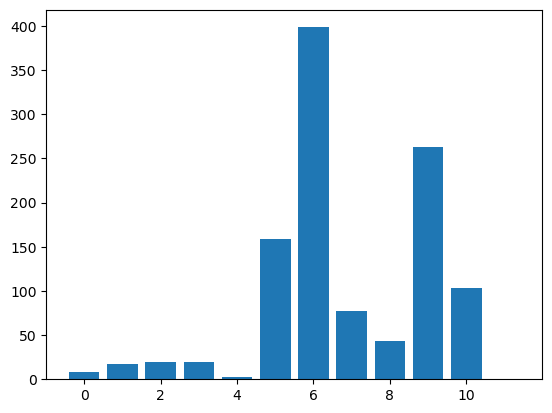

In [21]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [22]:
fs = SelectKBest(score_func=f_regression, k=4)

In [23]:
fs.fit(x_train, y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x000001CD2FE864D0>)

In [24]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [25]:
x_test_fs.shape

(261, 4)

In [26]:
model = RandomForestRegressor()

In [27]:
model.fit(x_train_fs, y_train)

RandomForestRegressor()

In [28]:
y_pred_fs = model.predict(x_test_fs)

In [29]:
model.score(x_train_fs, y_train)

0.8849359200979937

In [30]:
model.score(x_test_fs, y_test)

0.7525126791172936

In [31]:
fs = SelectKBest(score_func=f_regression, k=1)

In [32]:
fs.fit(x_train, y_train)

SelectKBest(k=1, score_func=<function f_regression at 0x000001CD2FE864D0>)

In [33]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [34]:
model.fit(x_train_fs, y_train)

RandomForestRegressor()

In [35]:
model.score(x_train_fs, y_train)

0.6270898684745378

In [36]:
model.score(x_test_fs, y_test)

0.6370306930764864

In [37]:
mean_absolute_error(y_test,y_pred)

167.85994712643677

In [38]:
mean_squared_error(y_test,y_pred)

81277.66576766798

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

285.09238111122505

In [40]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])

In [41]:
Output.head()

,Actual,Prediction
0,1672.0,1311.0570
1,1149.0,1553.9900
2,499.0,551.6211
3,899.0,939.2711
4,1244.0,1358.0717


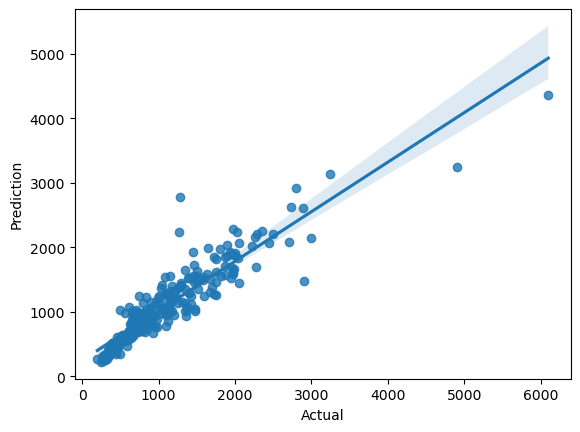

In [42]:
sns.regplot(data=Output,x='Actual',y='Prediction')
plt.show()